In [2]:
import pandas as pd
import numpy as np 

In [3]:
bugs = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [5]:
bugs.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [7]:
url_pred = 'https://stepik.org/media/attachments/course/4852/operative_information.csv'

In [8]:
bugs_pred = pd.read_csv(url_pred)

In [9]:
bugs_pred.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
X = bugs.drop('class', axis=1)
y = bugs['class']

In [12]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [13]:
grid_search_cv_clf = GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 13, 2),
                         'min_samples_split': range(2, 10, 2),
                         'min_samples_leaf': range(1, 8),
                         'n_estimators': range(10, 51, 10)})

In [14]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [18]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [19]:
import matplotlib.pyplot as plt
grid_search_cv_clf.best_estimator_.feature_importances_

array([0.08141323, 0.11381432, 0.1269364 , 0.38177624, 0.        ,
       0.29605981])

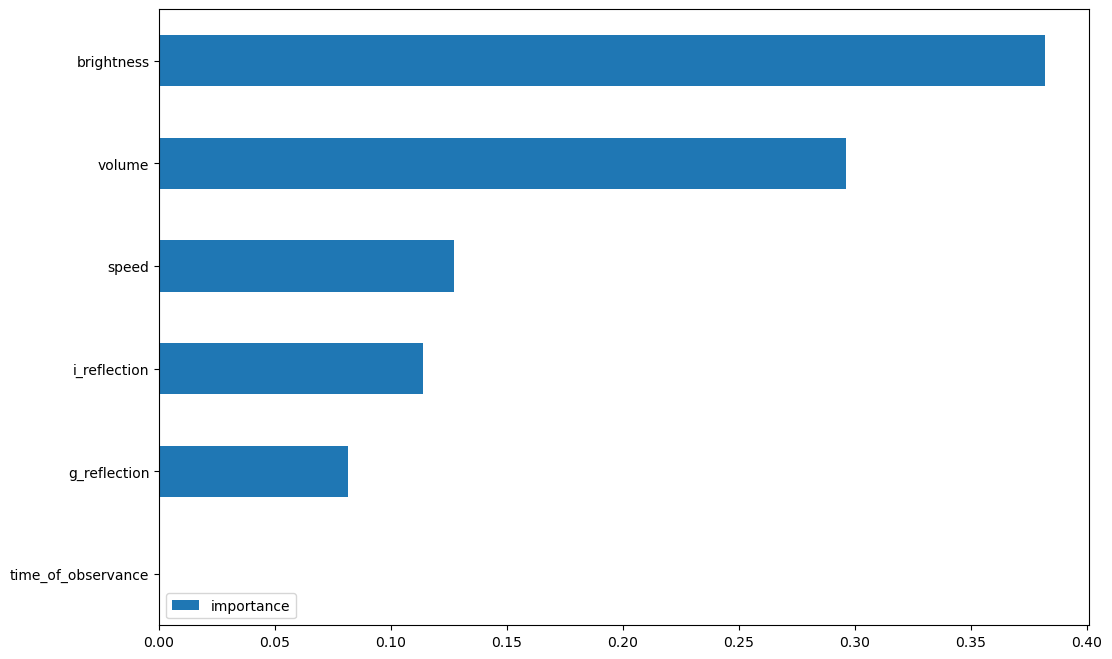

In [20]:
imp = pd.DataFrame(grid_search_cv_clf.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()

In [21]:
y_pred = grid_search_cv_clf.predict(bugs_pred)

In [22]:
y_pred

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [23]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64